## PyAirPollution Data Analysis

In this tutorial, we use the US EPA AirData, a public database from the US Environmental Protection Agency. It has detailed air quality data, including PM2.5 levels, for various years. You can download it in formats like yearly concentration or Air Quality Index by county. With its extensive data, it's great for researching air quality trends and effects.

### 1. Importing the Data

- Get the PM2.5 data file from the US EPA AirData site.
- Open the file called 'annual_aqi_by_county_2023.csv'.
- This CSV file contains fields includes:

  - **State:** The state in which the air quality was measured.
  - **County:** The specific county within the state.
  - **Year**: The year the data was recorded.
  - **Days with AQI:** Total number of days air quality was measured.
  - **Good Days:** Days with good air quality.
  - **Moderate Days:** Days with moderate air quality.
  - **Unhealthy for Sensitive Groups Days:** Days when air quality was unhealthy for sensitive groups like people with asthma.
  - **Unhealthy Days:** Days with unhealthy air quality for the general population.
  - **Very Unhealthy Days:** Days with very poor air quality, posing health risks to everyone.
  - **Hazardous Days:** Days with extremely dangerous air quality levels.
  - **Max AQI:** Maximum Air Quality Index recorded in the year.
  - **90th Percentile AQI:** The AQI value below which 90% of all AQI values fall.
  - **Median AQI:** The middle AQI value when all are lined up from lowest to highest.
  - **Days CO:** Days when Carbon Monoxide (CO) was the primary pollutant.
  - **Days NO2:** Days when Nitrogen Dioxide (NO2) was the primary pollutant.
  - **Days Ozone:** Days when Ozone was the primary pollutant.
  - **Days PM2.5:** Days when fine particulate matter (PM2.5) was the primary pollutant.
  - **Days PM10:** Days when coarse particulate matter (PM10) was the primary pollutant.


In [12]:
# Flag to determine the source of the file
use_local_file = False # Change to True if you want to use a local file

In [13]:
import pandas as pd

if use_local_file:
  # Import file from a local file
  df = pd.read_csv('sample_data.csv')
else:
  # Import file from GitHub raw URL
  url = 'https://raw.githubusercontent.com/peyrone/PyAirPollution/main/annual_aqi_by_county_2023.csv'
  df = pd.read_csv(url)

In [14]:
import pandas as pd

# Load the dataset
epa_data = pd.read_csv('annual_aqi_by_county_2023.csv')
print(epa_data.head())

     State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2023            170        143             27   
1  Alabama     Clay  2023            155        109             46   
2  Alabama   DeKalb  2023            212        155             55   
3  Alabama   Elmore  2023            118        102             16   
4  Alabama   Etowah  2023            181        126             55   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    2               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       90      

### 2. Cleaning and Preparing Data

- Handle missing values, correct data types, and remove duplicates.

#### 2.1 Inspect for Missing Values

In [15]:
# Check for missing values
print(epa_data.isnull().sum())

# If missing values are not significant, we might drop them
epa_data.dropna(inplace=True)

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64


#### 2.2 Correcting Data Types

In [16]:
# Correct data types if needed
epa_data['Year'] = epa_data['Year'].astype(str)

### 2.3 Dealing with Duplicates

In [17]:
# Remove duplicate rows
epa_data.drop_duplicates(inplace=True)

### 2.4 Handling Outliers

In [18]:
# Example using Z-score
from scipy import stats
z_scores = stats.zscore(epa_data['Good Days'])

outliers = epa_data[(abs(z_scores) > 3)]
print("Outliers based on Z-scores:\n", outliers)

Outliers based on Z-scores:
 Empty DataFrame
Columns: [State, County, Year, Days with AQI, Good Days, Moderate Days, Unhealthy for Sensitive Groups Days, Unhealthy Days, Very Unhealthy Days, Hazardous Days, Max AQI, 90th Percentile AQI, Median AQI, Days CO, Days NO2, Days Ozone, Days PM2.5, Days PM10]
Index: []


### 3. Exploring Data

- Explore the data with basic statistical methods.

In [19]:
# Summary statistics and information
print(epa_data.describe())
print(epa_data.info())

       Days with AQI   Good Days  Moderate Days  \
count     949.000000  949.000000     949.000000   
mean      194.891465  146.892518      43.481560   
std        51.563261   44.509908      30.623047   
min        29.000000   25.000000       0.000000   
25%       179.000000  119.000000      21.000000   
50%       182.000000  150.000000      37.000000   
75%       241.000000  173.000000      59.000000   
max       274.000000  271.000000     153.000000   

       Unhealthy for Sensitive Groups Days  Unhealthy Days  \
count                           949.000000      949.000000   
mean                              3.541623        0.832455   
std                               5.153100        1.569205   
min                               0.000000        0.000000   
25%                               0.000000        0.000000   
50%                               2.000000        0.000000   
75%                               5.000000        1.000000   
max                              51.000000  

**Understanding Correlation Values:**

- Correlation coefficients range from -1 to 1.
- A value close to 1 implies a strong positive correlation (as one variable increases, so does the other).
- A value close to -1 implies a strong negative correlation (as one variable increases, the other decreases).
- A value around 0 suggests no correlation.

In [20]:
# Correlation Analysis
correlation_matrix = epa_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                      Days with AQI  Good Days  Moderate Days  \
Days with AQI                             1.000000   0.753679       0.535869   
Good Days                                 0.753679   1.000000      -0.141380   
Moderate Days                             0.535869  -0.141380       1.000000   
Unhealthy for Sensitive Groups Days       0.222029  -0.233988       0.515064   
Unhealthy Days                            0.260172  -0.042078       0.354046   
Very Unhealthy Days                       0.152913  -0.066285       0.268824   
Hazardous Days                            0.003546  -0.023558       0.001262   
Max AQI                                   0.196808  -0.071836       0.332889   
90th Percentile AQI                       0.076232  -0.336986       0.484537   
Median AQI                                0.197731  -0.306878       0.682067   
Days CO                                   0.127156   0.158223      -0.014292   
Days NO2          

**This correlation matrix analyzes relationships between air quality indicators:**

- **'Days with AQI'** and **'Good Days'** are strongly correlated, indicating more monitored days often mean more good air quality days.
- **'Moderate Days'** negatively affect **'Good Days'** but correlate positively with **'Days with AQI'**.
- **'Unhealthy for Sensitive Groups Days'** increase with **'Moderate Days'** but decrease **'Good Days'**.
- A strong negative correlation between **'Days Ozone' and 'Days PM2.5'** suggests that high ozone days often have low PM2.5 pollution, and vice versa.
- Higher pollution levels (Max AQI, 90th Percentile AQI, Median AQI) are associated with more **'Moderate'**, **'Unhealthy for Sensitive Groups'**, and **'Unhealthy'** days.

### 4. Visualizing Data

- Show the data in graphs to see trends and patterns. For example, make a bar chart to display the average good days in each state.

In [21]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


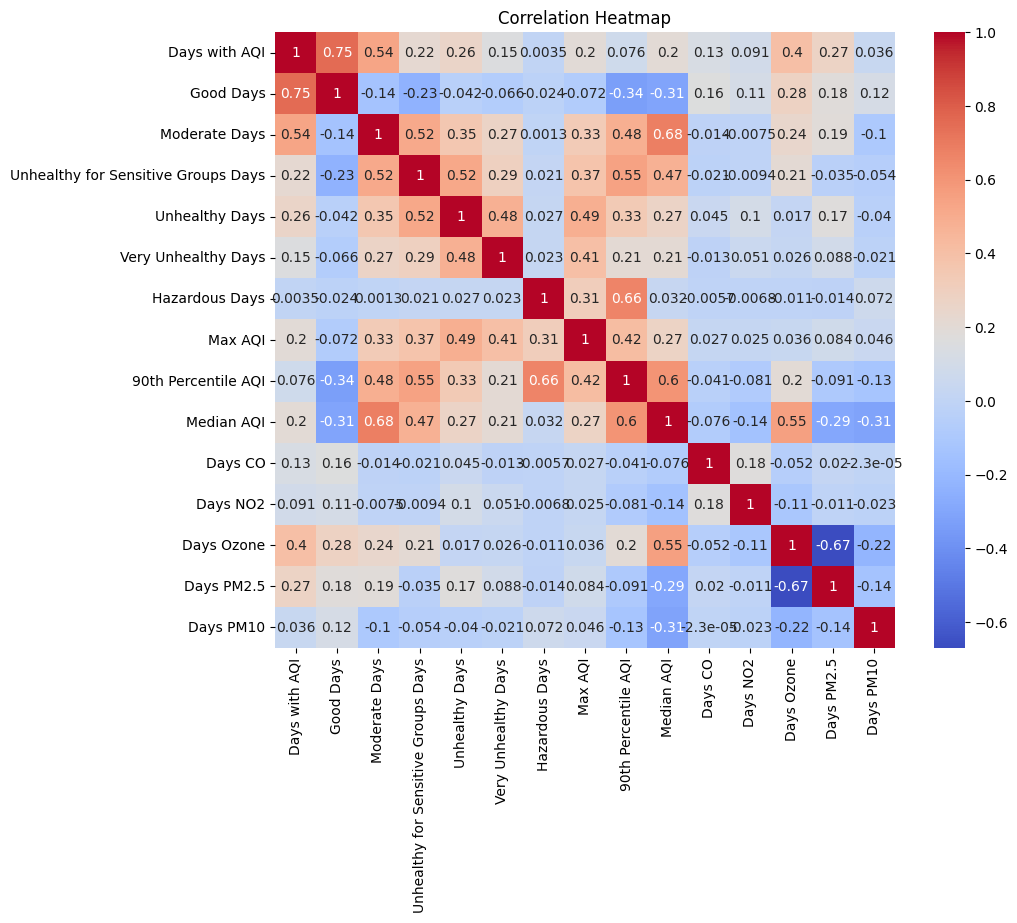

In [22]:
# Heatmap of Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

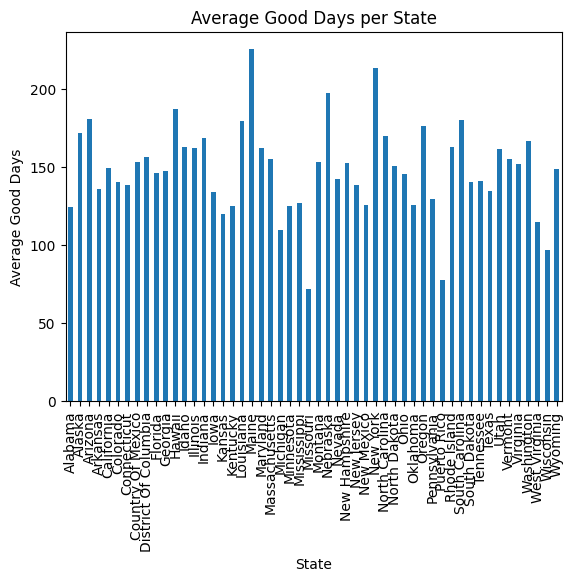

In [23]:
# Plotting PM2.5 data
avg_good_days = epa_data.groupby('State')['Good Days'].mean()
avg_good_days.plot(kind='bar')
plt.ylabel('Average Good Days')
plt.title('Average Good Days per State')
plt.show()